This is a notebook for find the color target for eco-disaster 

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [12, 6]

from matplotlib import patches as patches

import importlib

import color_target_fun as ctf


(300, 400, 3)


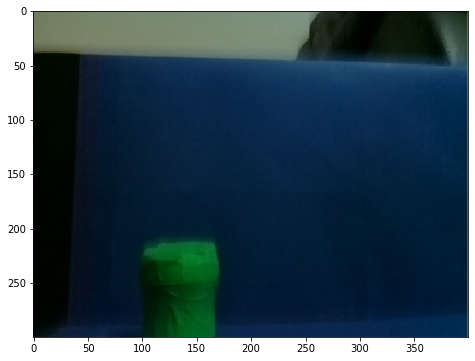

In [14]:
#bgrimg = cv2.imread("D:/DashanGao/Robotics/Claire/PiWarsUCSD/images/seq1/videoimage000001.jpg")
#bgrimg = cv2.imread("D:/DashanGao/Robotics/Claire/PiWarsUCSD/images/seq1/videoimage000060.jpg")
#bgrimg = cv2.imread("D:/DashanGao/Robotics/Claire/PiWarsUCSD/images/seq1/videoimage000083.jpg")
#bgrimg = cv2.imread("D:/DashanGao/Robotics/Claire/PiWarsUCSD/images/seq1/videoimage000109.jpg")
bgrimg = cv2.imread("D:/DashanGao/Robotics/Claire/PiWarsUCSD/images/seq1/videoimage000209.jpg")
img = bgrimg[...,::-1]
print(img.shape)
plt.imshow(img)

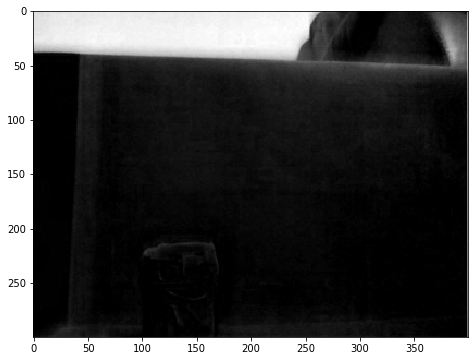

In [15]:
imgr = img[:,:,0]
plt.imshow(imgr,'gray')

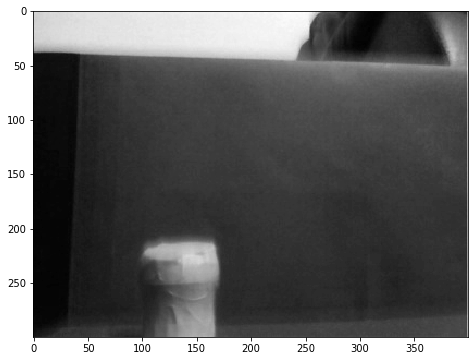

In [16]:
imgg = img[:,:,1]
plt.imshow(imgg,'gray')

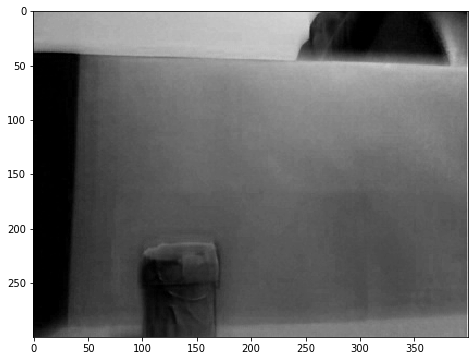

In [17]:
imgb = img[:,:,2]
plt.imshow(imgb,'gray')

(300, 400, 3)
    norm_rgb max:  [0.49875312 0.99973691 0.72714052]
    norm_rgb min:  [0. 0. 0.]


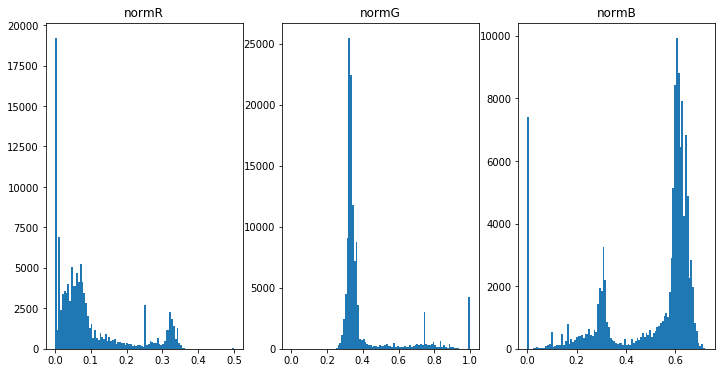

In [18]:
norm_rgb = ctf.normRGB(img, True)

(120000, 3)
    patch max:  [129 151 157]
    patch min:  [0 0 0]
    r/g max:  0.966693744922827
    r/g min:  0.0
    r/b max:  170.0
    r/b min:  0.0
    g/b max:  3800.0
    g/b min:  0.0


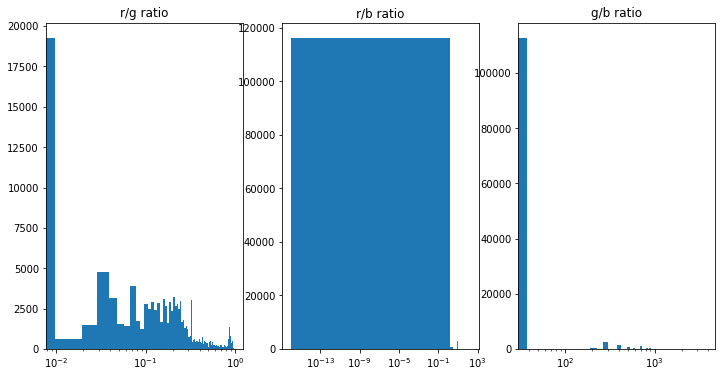

In [19]:
ratioRG, ratioRB, ratioGB = ctf.patch_stats(img)
rgbRatioImg = np.dstack((ratioRG, ratioRB, ratioGB))

(10, 5, 3)
(50, 3)
    patch max:  [103  65  51]
    patch min:  [48  7  0]
    r/g max:  7.183098591549296
    r/g min:  1.5514592933947775
    r/b max:  690.0
    r/b min:  1.9765166340508806
    g/b max:  2200.0
    g/b min:  1.274259949029602


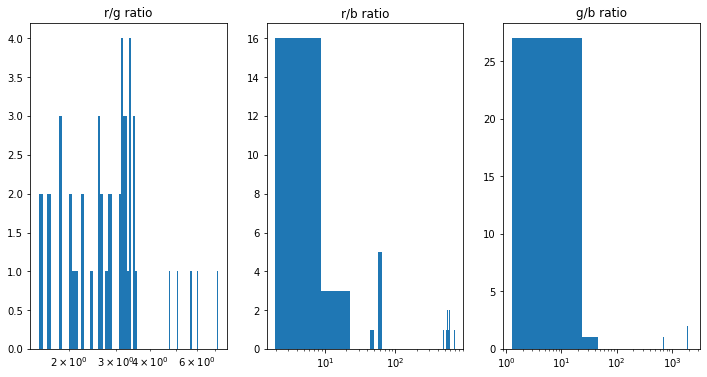

In [15]:
# find the red target, i.e. the one with r >> g & b, and g & b are close  
# a red patch 
patch = img[210:220,230:235,:]
print(patch.shape)
t1,t2,t3 = ctf.patch_stats(patch)

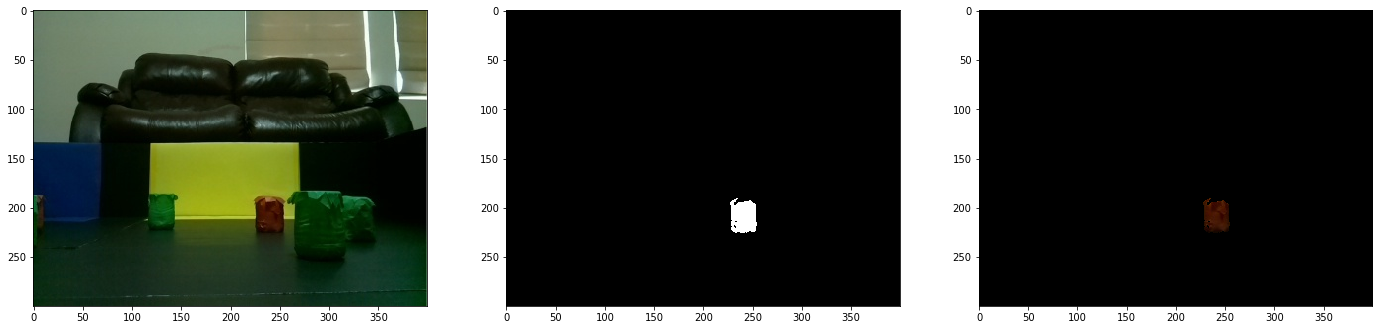

In [16]:
plt.rcParams['figure.figsize'] = [24, 12]
#use RGB ratio for red color
red_mask_ratio  = (ratioRG>2) & (ratioRB>2) & (img[:,:,1]<50) & (img[:,:,2]<50)
ctf.visMask(img, red_mask_ratio, [24, 12])

(<matplotlib.axes._subplots.AxesSubplot at 0x1de06b9c788>,
 <matplotlib.image.AxesImage at 0x1de068f5d48>)

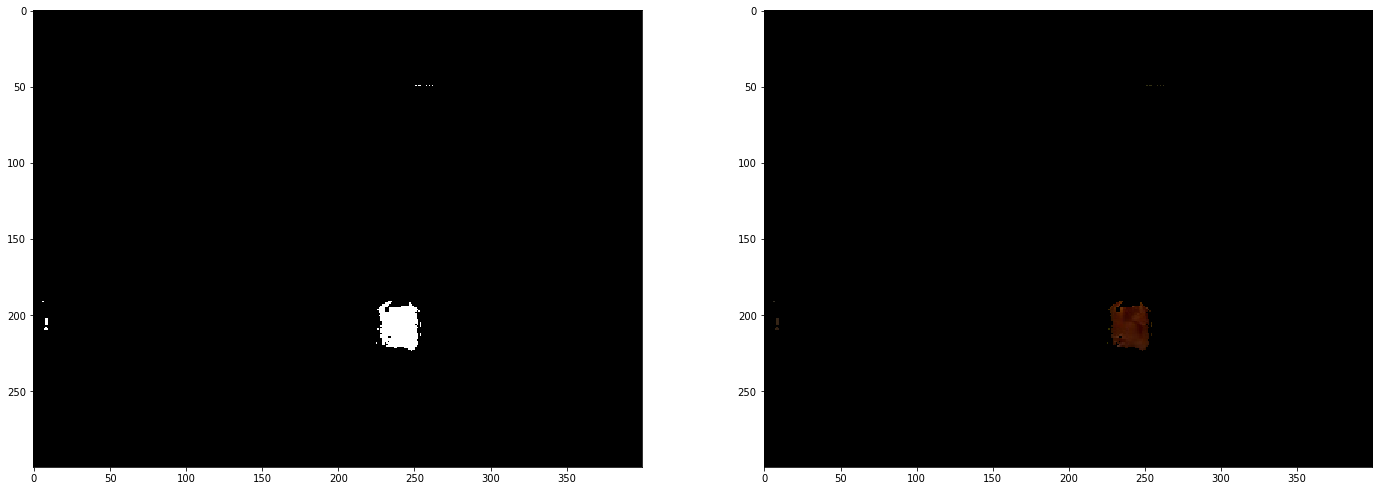

In [17]:
# use RGB threshold 
im_red_mask = cv2.inRange(img, (50, 0, 0), (255, 50, 50))
plt.subplot(121),plt.imshow(im_red_mask,'gray')
im_red_mask = im_red_mask.astype('bool')
plt.subplot(122), plt.imshow(img * np.dstack((im_red_mask, im_red_mask, im_red_mask)))

(<matplotlib.axes._subplots.AxesSubplot at 0x1de08430f88>,
 <matplotlib.image.AxesImage at 0x1de084cca08>)

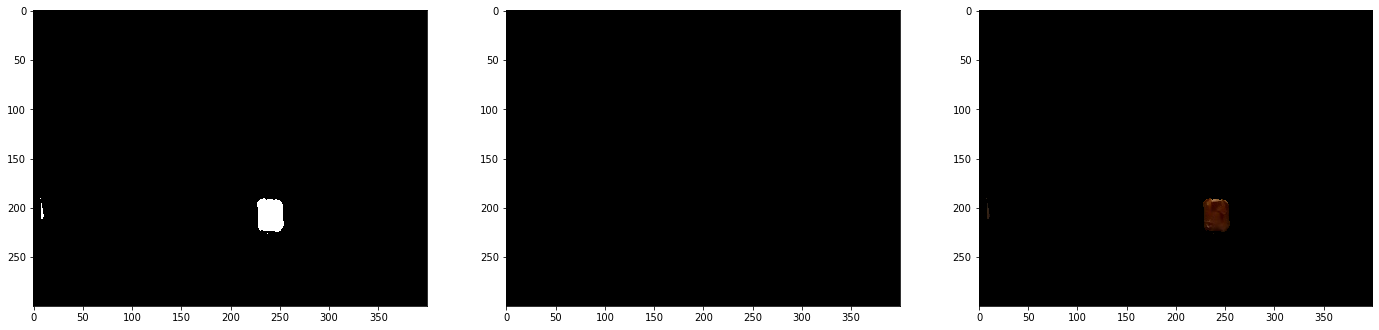

In [18]:
hsvimg = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
im_red_mask_1 = cv2.inRange(hsvimg, (0, 100, 30), (15, 255, 255))
im_red_mask_2 = cv2.inRange(hsvimg, (165, 100, 30), (180, 255, 255)) 
plt.subplot(131),plt.imshow(im_red_mask_1,'gray')
plt.subplot(132),plt.imshow(im_red_mask_2,'gray')
im_red_mask_1 = im_red_mask_1.astype('bool')
im_red_mask_2 = im_red_mask_2.astype('bool')
im_red_mask_hsv = im_red_mask_1 + im_red_mask_2
plt.subplot(133), plt.imshow(img * np.dstack((im_red_mask_hsv, im_red_mask_hsv, im_red_mask_hsv)))

(10, 5, 3)
    norm_rgb max:  [0.87915877 0.30142098 0.23501221]
    norm_rgb min:  [0.46541634 0.12066885 0.        ]


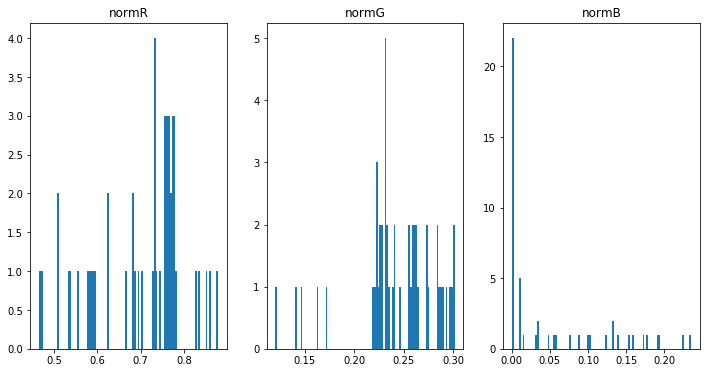

In [19]:
# use normRGB to for the segmentation 
patch = img[210:220,230:235,:]
normpatch = ctf.normRGB(patch, True)

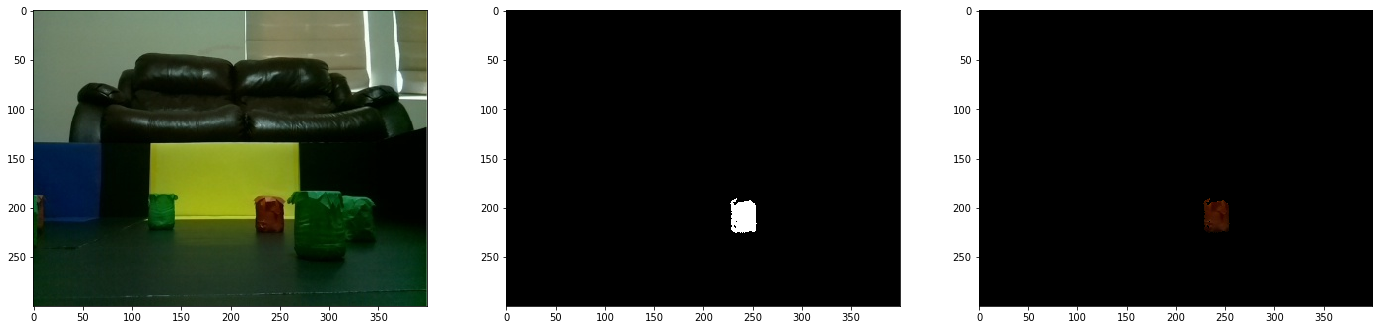

In [20]:
#use normRGB for red color
normRGBTh = [0.5, -0.3, -0.2]
mask1 = ctf.img_mask(norm_rgb, normRGBTh)
imgRGBTh = [0, -50, -50]
mask2 = ctf.img_mask(img, imgRGBTh)
red_norm_mask = mask1 & mask2
ctf.visMask(img, red_norm_mask)

ground patch
(50, 3)
    patch max:  [22 58 42]
    patch min:  [14 51 34]
    r/g max:  0.39215686274509803
    r/g min:  0.273972602739726
    r/b max:  0.5486284289276808
    r/b min:  0.39370078740157477
    g/b max:  1.4995589532490445
    g/b min:  1.356819804808379


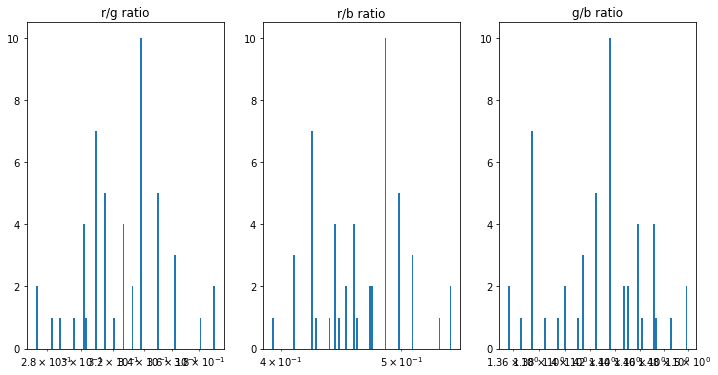

patch on green (dark) 
(50, 3)
    patch max:  [ 7 60  4]
    patch min:  [ 0 42  0]
    r/g max:  0.12259194395796848
    r/g min:  0.0
    r/b max:  30.0
    r/b min:  0.0
    g/b max:  5700.0
    g/b min:  14.214463840399004


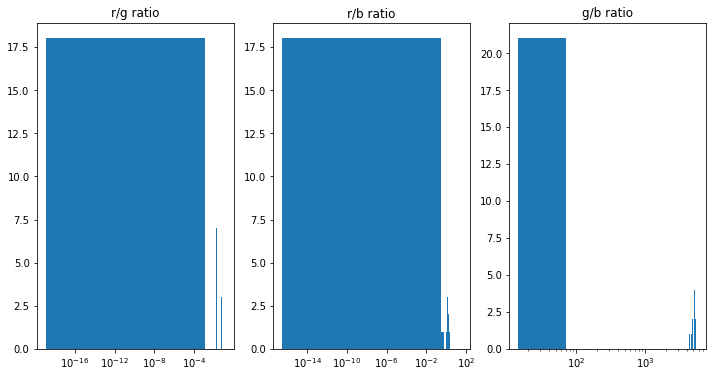

In [21]:
#find green color 
#a ground patch with some green
print("ground patch")
patch = img[260:270,350:355,:]
t,t,t=ctf.patch_stats(patch)
#green patch 
print("patch on green (dark) ")
patch2 = img[200:210,270:275,:]
t,t,t=ctf.patch_stats(patch2)

patch on green (light) 
(50, 3)
    patch max:  [  2 142  66]
    patch min:  [  0 138  62]
    r/g max:  0.014275517487508924
    r/g min:  0.0
    r/b max:  0.03169572107765452
    r/b min:  0.0
    g/b max:  2.2415739396871475
    g/b min:  2.1511892137554915


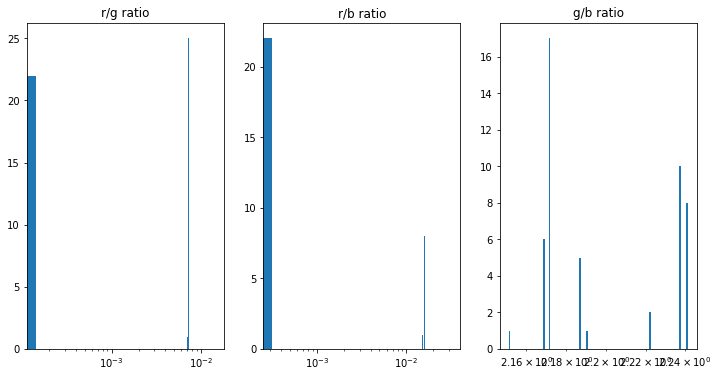

In [13]:
#green patch 
print("patch on green (light) ")
patch3 = img[200:210,250:255,:]
#plt.imshow(patch3)
t,t,t=ctf.patch_stats(patch3)

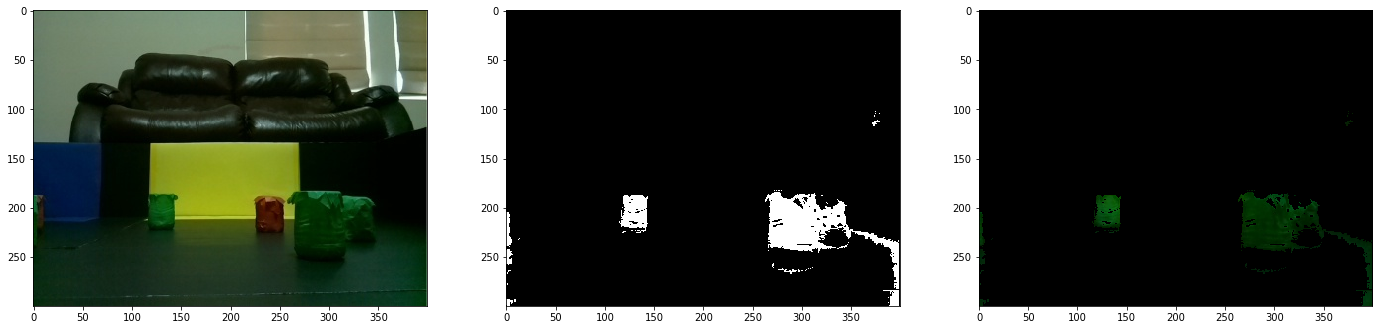

In [22]:
# use RGB ratio
rg_th = 0.2 # 0.3
gb_th = 3
r_th = 30 #50
g_th = 30 #30
b_th = 30 #50
#green_mask_ratio  = (ratioRG < rg_th) & (ratioGB>gb_th) & (img[:,:,0]<r_th) & (img[:,:,1]>g_th) & (img[:,:,2]<b_th)
green_mask_ratio  = ctf.RGB_Ratio_Mask(img, rgbRatioImg, np.array([-r_th, g_th, -b_th]), np.array([-rg_th, 0, gb_th]), True, [24,12])

(<matplotlib.axes._subplots.AxesSubplot at 0x1de06c06808>,
 <matplotlib.image.AxesImage at 0x1de06a75308>)

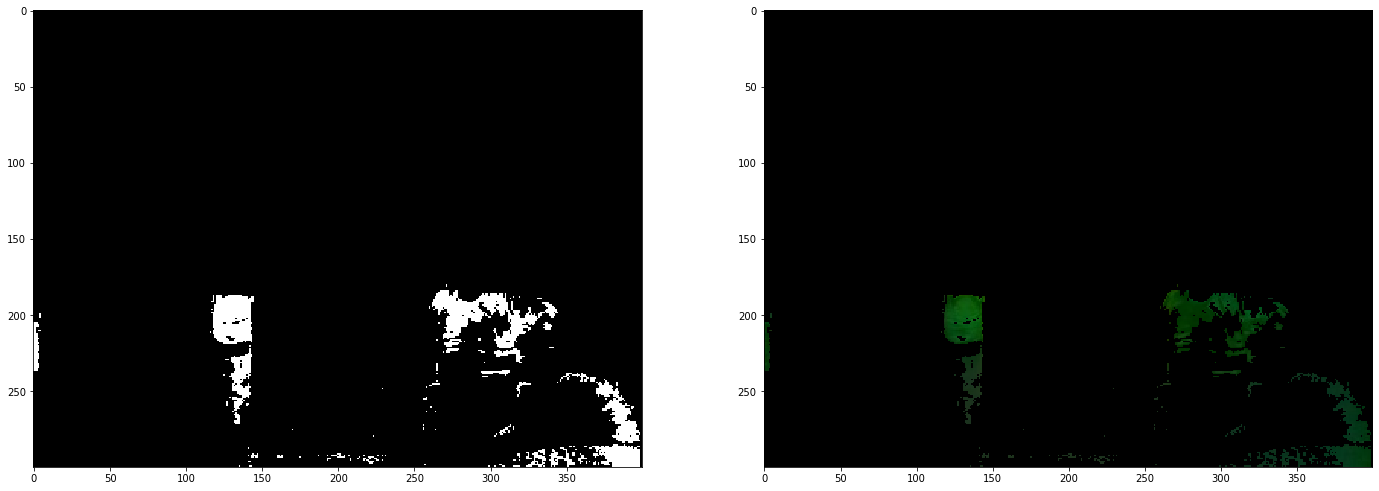

In [23]:
# use RGB 
im_green_mask = cv2.inRange(img, (0, 50, 0), (30, 255, 30))
plt.subplot(121),plt.imshow(im_green_mask,'gray')
im_green_mask = im_green_mask.astype('bool')
plt.subplot(122), plt.imshow(img * np.dstack((im_green_mask, im_green_mask, im_green_mask)))

(<matplotlib.axes._subplots.AxesSubplot at 0x1de084acac8>,
 <matplotlib.image.AxesImage at 0x1de08789e08>)

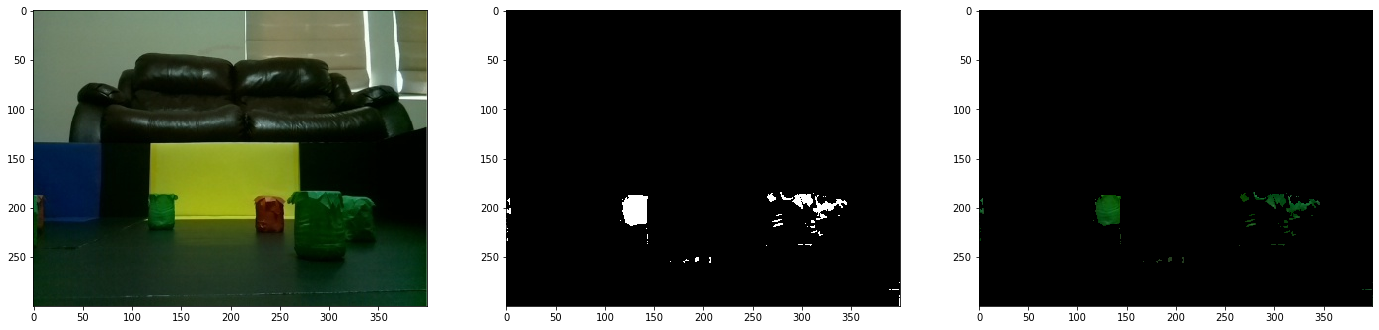

In [24]:
#use hsv threshold
hsvimg = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
#im_green_mask = cv2.inRange(hsvimg, (50, 120, 55), (70, 255, 255))
im_green_mask = cv2.inRange(hsvimg, (55, 120, 60), (70, 255, 255))
plt.subplot(131),plt.imshow(img)
plt.subplot(132),plt.imshow(im_green_mask,'gray')
im_green_mask = im_green_mask.astype('bool')
plt.subplot(133), plt.imshow(img * np.dstack((im_green_mask, im_green_mask, im_green_mask)))

ground patch
(10, 5, 3)
    norm_rgb max:  [0.18642488 0.51509948 0.35845675]
    norm_rgb min:  [0.14139986 0.47453606 0.33895433]


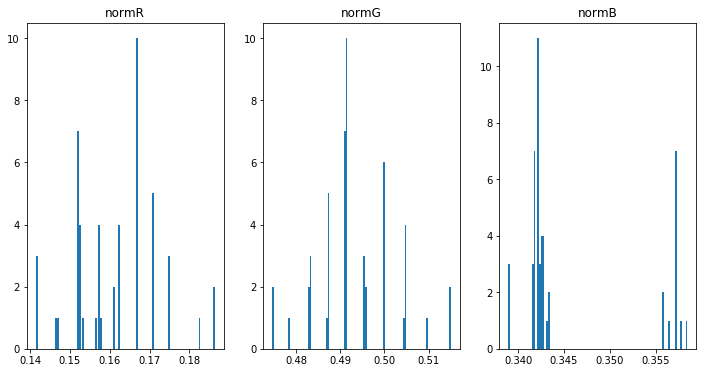

patch on green (dark) 
(10, 5, 3)
    norm_rgb max:  [0.18642488 0.51509948 0.35845675]
    norm_rgb min:  [0.14139986 0.47453606 0.33895433]


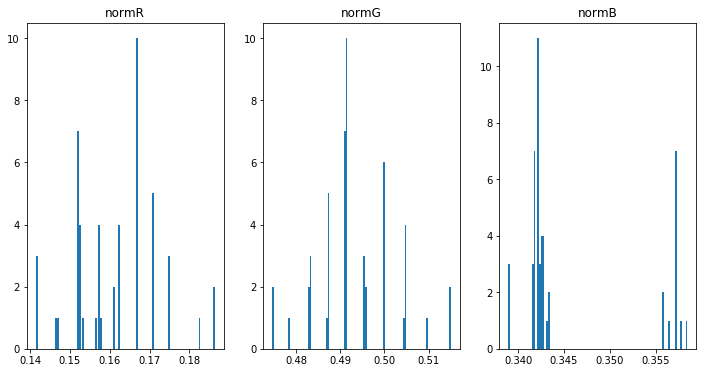

In [25]:
#find green color 
#a ground patch with some green
print("ground patch")
patch = img[260:270,350:355,:]
normpatch = ctf.normRGB(patch, True)
#green patch 
print("patch on green (dark) ")
patch2 = img[200:210,270:275,:]
normpatch = ctf.normRGB(patch, True)

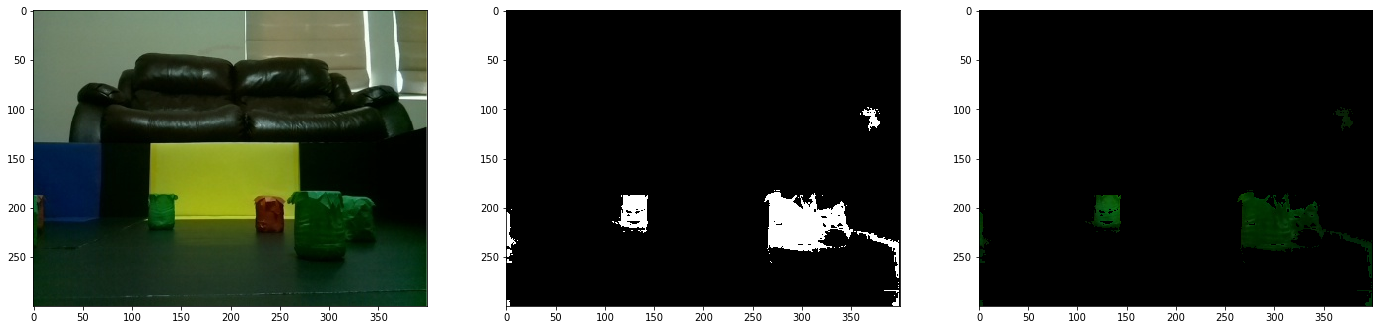

In [26]:
#use normRGB for green color
normRGBTh = [-0.2, 0.6, -0.2]
mask1 = ctf.img_mask(norm_rgb, normRGBTh)
imgRGBTh = [-30, 30, -30]
mask2 = ctf.img_mask(img, imgRGBTh)
green_norm_mask = mask1 & mask2
ctf.visMask(img, green_norm_mask)

patch on blue
(50, 3)
    patch max:  [ 2 27 67]
    patch min:  [ 0 24 64]
    r/g max:  0.07380073800738007
    r/g min:  0.0
    r/b max:  0.02980625931445604
    r/b min:  0.0
    g/b max:  0.40902893500984694
    g/b min:  0.3749414154038431


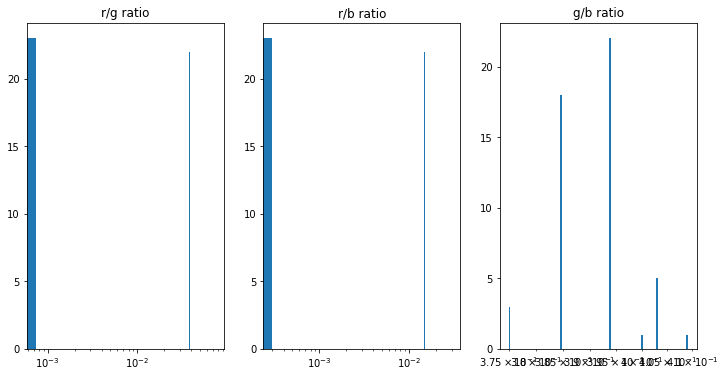

In [27]:
# find the blue mask 
print("patch on blue")
patch = img[155:165,40:45,:]
t,t,t=ctf.patch_stats(patch)

patch on blue
(50, 3)
    patch max:  [ 5 32 58]
    patch min:  [ 2 29 54]
    r/g max:  0.1607717041800643
    r/g min:  0.06644518272425248
    r/b max:  0.08912655971479501
    r/b min:  0.03696857670979667
    g/b max:  0.571326548830566
    g/b min:  0.5177646848777004


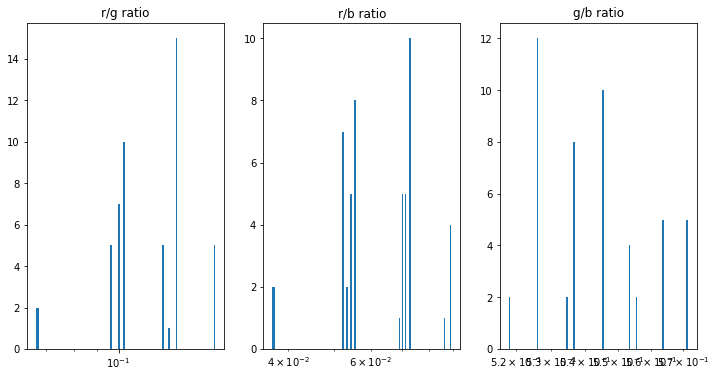

In [25]:
# find the blue mask 
print("patch on blue")
patch2 = img[200:210,250:255,:]
#plt.imshow(patch2)
t,t,t=ctf.patch_stats(patch2)

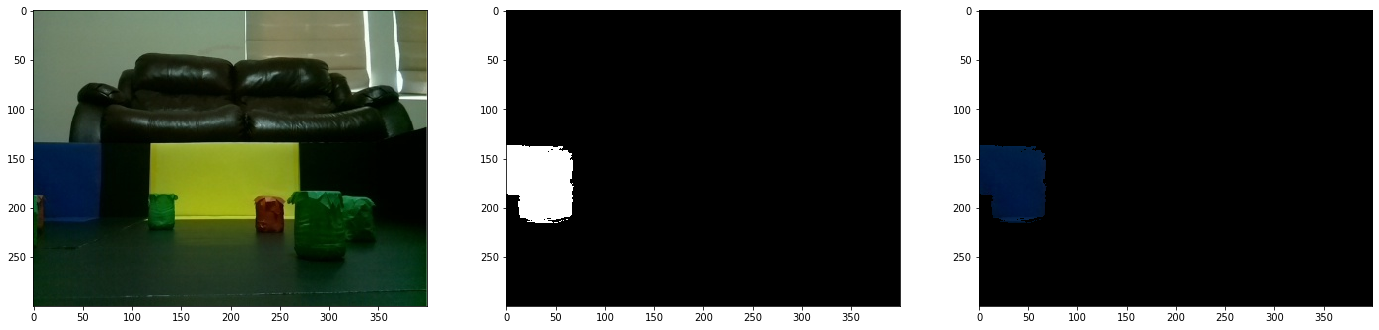

In [28]:
#use RGB ratio for Blue
rg_th = -0.5
rb_th = -0.2
gb_th = -0.5
r_th = -20
g_th = -50
b_th = 40
blue_mask_ratio  = ctf.RGB_Ratio_Mask(img, rgbRatioImg, np.array([r_th, g_th, b_th]), np.array([rg_th, rb_th, gb_th]), True)

patch on yellow
(50, 3)
    patch max:  [149 167  33]
    patch min:  [145 163  25]
    r/g max:  0.9012875536480687
    r/g min:  0.8890251379521766
    r/b max:  5.896414342629482
    r/b min:  4.501510574018127
    g/b max:  6.597361055577768
    g/b min:  5.05907300817934


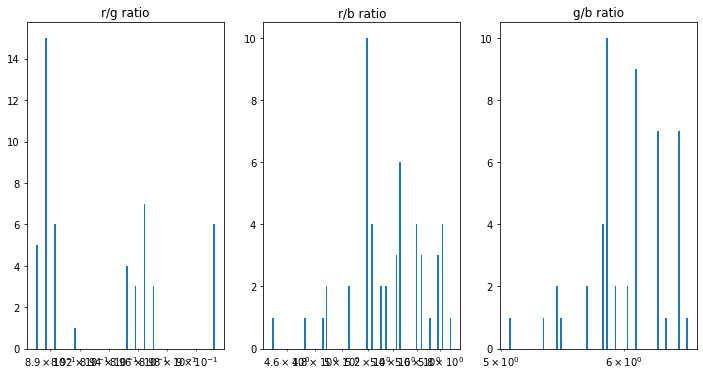

In [29]:
#find yello target
print("patch on yellow")
patch = img[155:165,190:195,:]
t,t,t=ctf.patch_stats(patch)

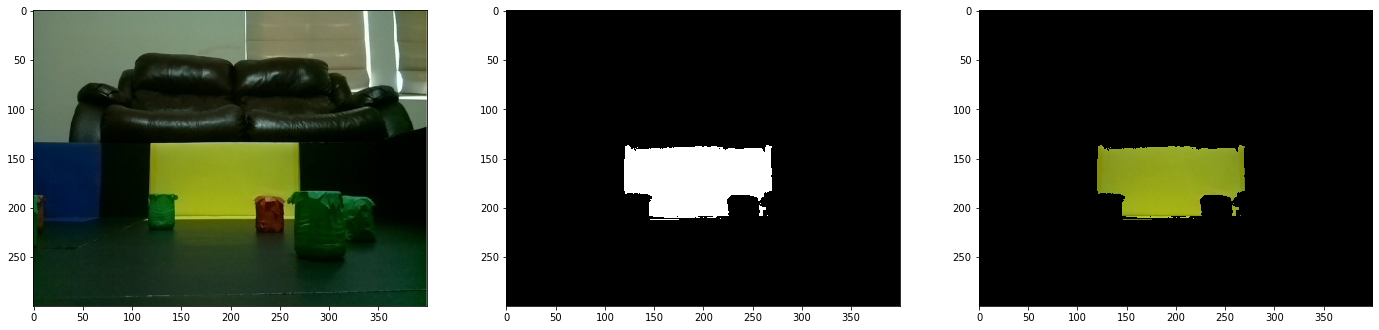

In [30]:
#use RGB ratio for Blue
rg_th = -1
rb_th = 3
gb_th = 3
r_th = 100
g_th = 100
b_th = -60
yellow_mask_ratio1  = ctf.RGB_Ratio_Mask(img, rgbRatioImg, np.array([r_th, g_th, b_th]), np.array([rg_th, rb_th, gb_th]), True)

(<matplotlib.axes._subplots.AxesSubplot at 0x1de08e24108>,
 <matplotlib.image.AxesImage at 0x1de08073bc8>)

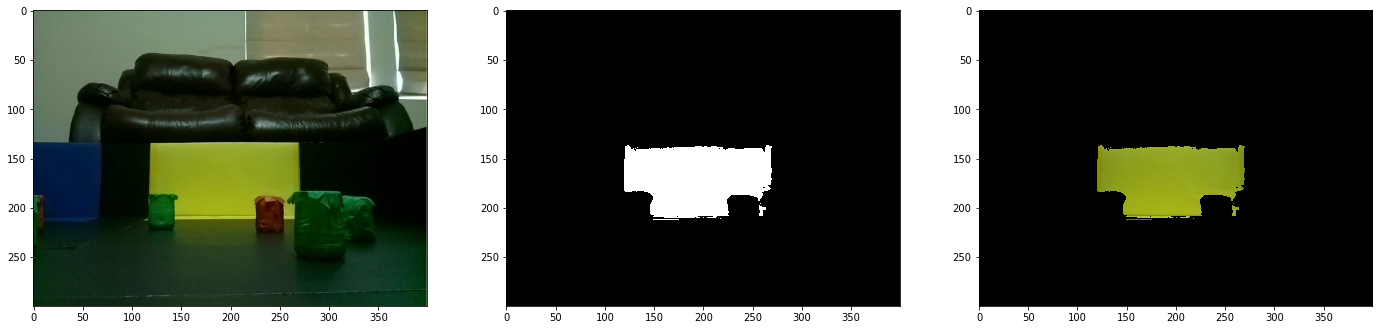

In [42]:
rg_th = 0.85 # 0.9
rb_th = 0
gb_th = 0
r_th = 0
g_th = 0
b_th = 0
yellow_mask_ratio  = yellow_mask_ratio1 & ctf.RGB_Ratio_Mask(img, rgbRatioImg, np.array([r_th, g_th, b_th]), np.array([rg_th, rb_th, gb_th]), False)
plt.subplot(131),plt.imshow(img)
plt.subplot(132),plt.imshow(yellow_mask_ratio,'gray')
plt.subplot(133), plt.imshow(img * np.dstack((yellow_mask_ratio, yellow_mask_ratio, yellow_mask_ratio)))

patch on black wall
(50, 3)
    patch max:  [0 2 0]
    patch min:  [0 2 0]
    r/g max:  0.0
    r/g min:  0.0
    r/b max:  0.0
    r/b min:  0.0
    g/b max:  200.0
    g/b min:  200.0


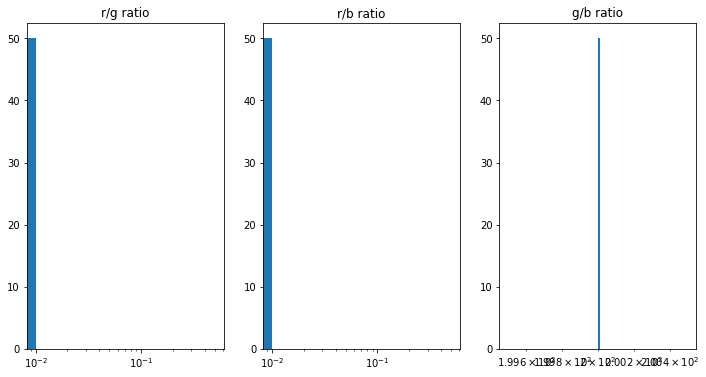

In [32]:
#now find the black wall 
print("patch on black wall")
patch = img[155:165,350:355,:]
t,t,t=ctf.patch_stats(patch)

patch on black wall 2
(50, 3)
    patch max:  [ 1 11  2]
    patch min:  [0 9 0]
    r/g max:  0.0900900900900901
    r/g min:  0.0
    r/b max:  10.0
    r/b min:  0.0
    g/b max:  1100.0
    g/b min:  5.472636815920398


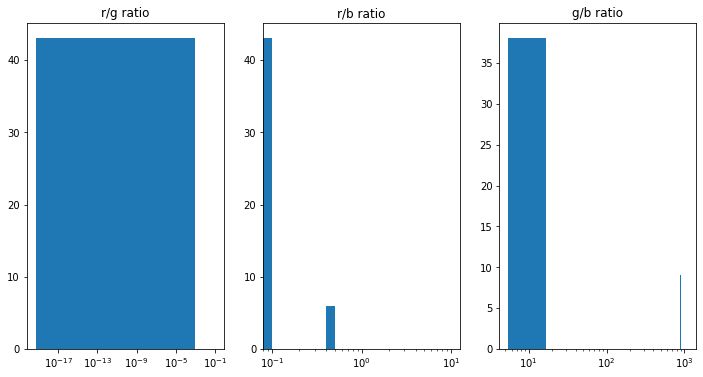

In [33]:
print("patch on black wall 2")
patch = img[200:210,95:100,:]
t,t,t=ctf.patch_stats(patch)

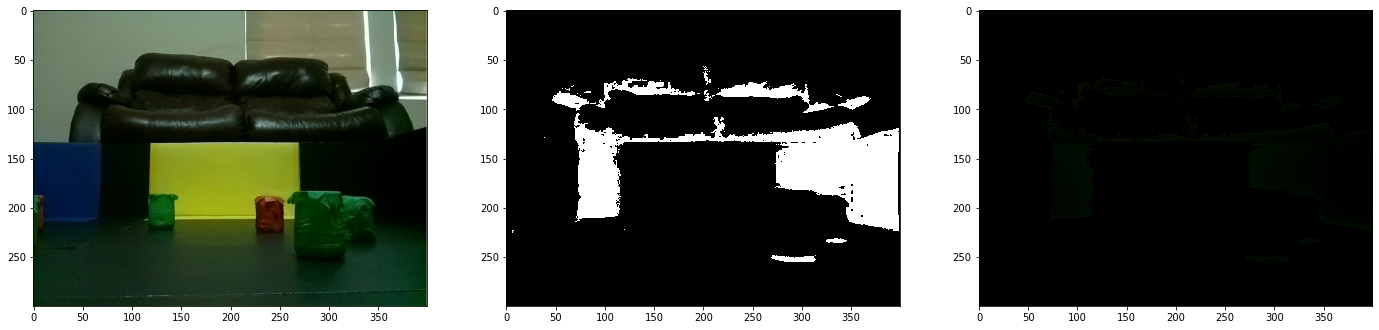

In [34]:
rg_th = -0.6
rb_th = 0
gb_th = 1.5
r_th = -10
g_th = -15
b_th = -10
blk_mask_ratio  = ctf.RGB_Ratio_Mask(img, rgbRatioImg, np.array([r_th, g_th, b_th]), np.array([rg_th, rb_th, gb_th]), True)

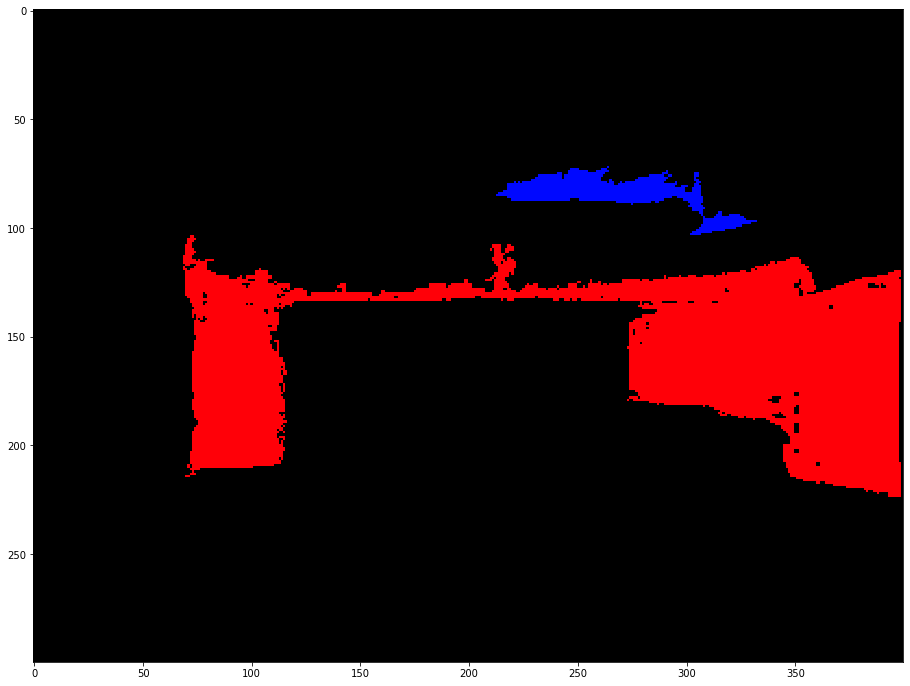

In [35]:
#clean up the masks 
sizeTh = 1000
num_labels, labels_im, stats, centroid = ctf.maskLabeling(blk_mask_ratio, sizeTh)
ctf.imshow_components(labels_im)

(<matplotlib.axes._subplots.AxesSubplot at 0x1de0869ae48>,
 <matplotlib.image.AxesImage at 0x1de086b8d48>)

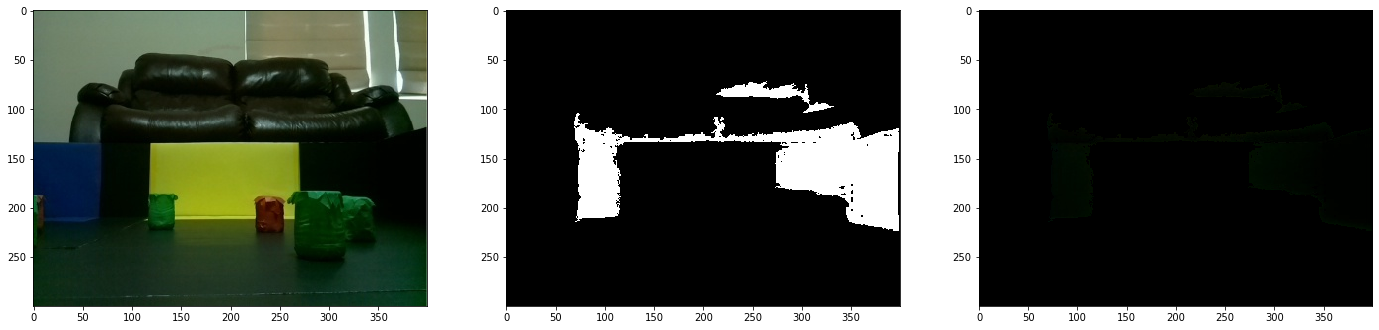

In [36]:
mask_clean = labels_im>0
plt.subplot(131),plt.imshow(img)
plt.subplot(132),plt.imshow(mask_clean,'gray')
plt.subplot(133), plt.imshow(img * np.dstack((mask_clean, mask_clean, mask_clean)))

(<matplotlib.axes._subplots.AxesSubplot at 0x1de08412588>,
 <matplotlib.image.AxesImage at 0x1de068e09c8>)

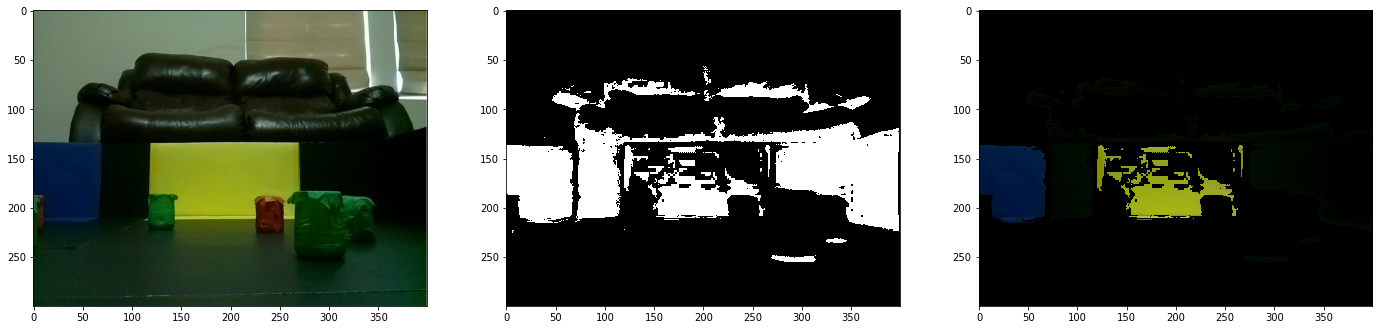

In [37]:
#combine the yellow, blue, and black for the wall
wall_mask = blk_mask_ratio + blue_mask_ratio + yellow_mask_ratio 
plt.subplot(131),plt.imshow(img)
plt.subplot(132),plt.imshow(wall_mask,'gray')
plt.subplot(133), plt.imshow(img * np.dstack((wall_mask, wall_mask, wall_mask)))

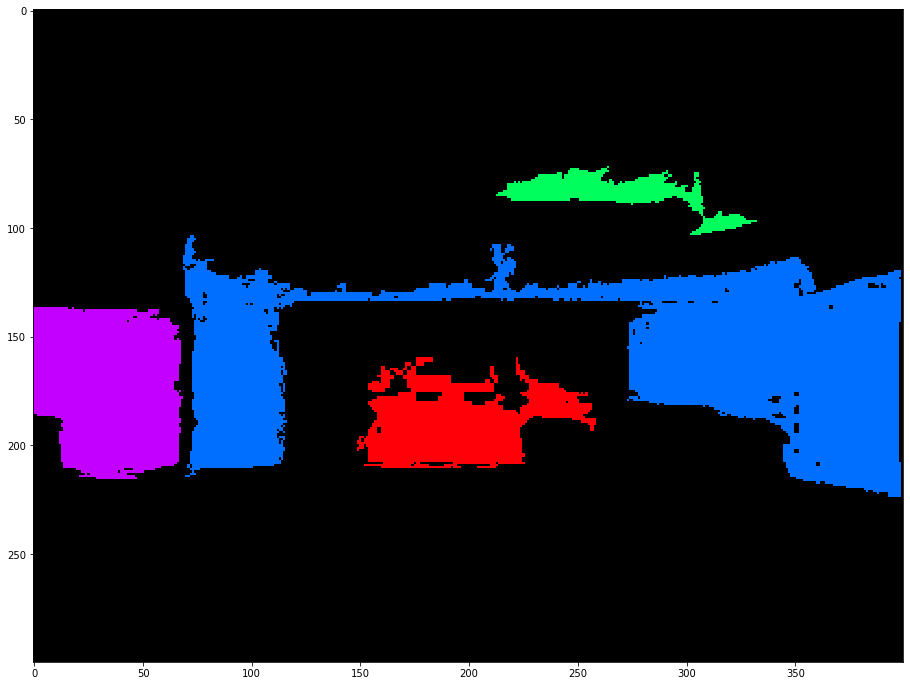

In [38]:
#clean up the masks 
sizeTh = 1000
num_labels, labels_im, stats, centroids = ctf.maskLabeling(wall_mask, sizeTh)
ctf.imshow_components(labels_im)

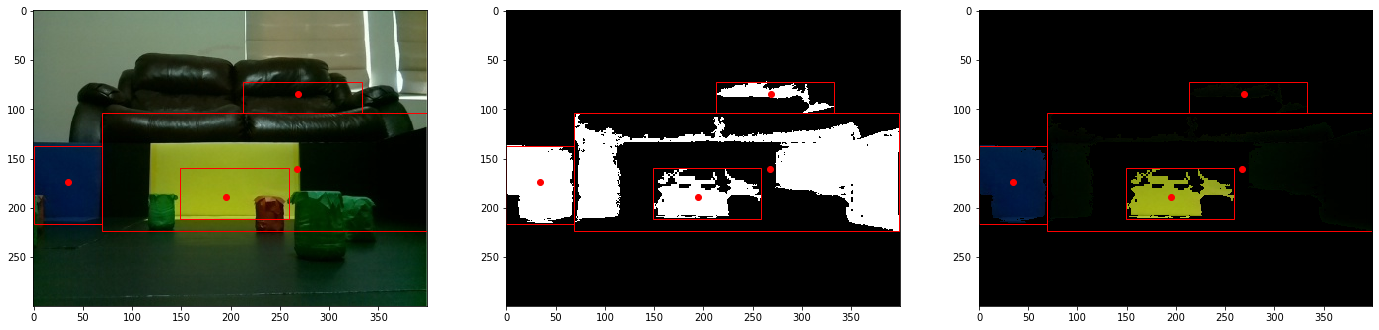

In [39]:
mask_clean = labels_im>0
#rects = ctf.createRectangles(stats[1:,:-1])
plt.subplot(131),plt.imshow(img)
ctf.plotRectangle(stats[1:,:-1], plt.gca())
plt.plot(centroids[1:,0],centroids[1:,1],'ro')
plt.subplot(132),plt.imshow(mask_clean,'gray')
ctf.plotRectangle(stats[1:,:-1], plt.gca())
plt.plot(centroids[1:,0],centroids[1:,1],'ro')
plt.subplot(133), plt.imshow(img * np.dstack((mask_clean, mask_clean, mask_clean)))
ctf.plotRectangle(stats[1:,:-1], plt.gca())
plt.plot(centroids[1:,0],centroids[1:,1],'ro')

11


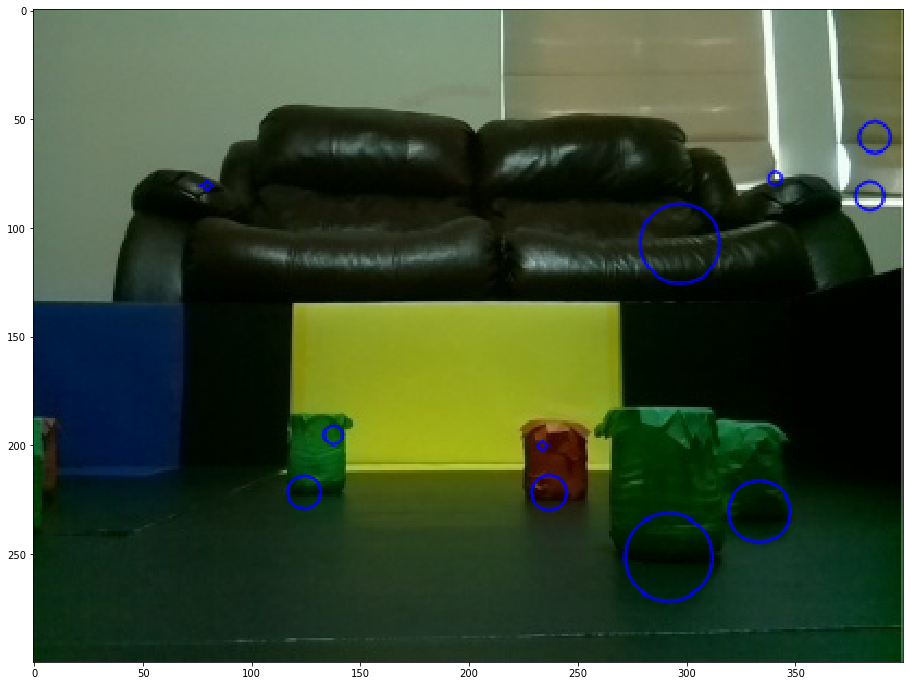

In [40]:
# try blob finder from opencv 
# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()

# Change thresholds
params.minThreshold = 10
params.maxThreshold = 250

# Filter by Area.
params.filterByArea = True
params.minArea = 10
#params.maxArea = 10000

# Filter by Circularity
params.filterByCircularity = False
params.minCircularity = 0.1

# Filter by Convexity
params.filterByConvexity = False
params.minConvexity = 0.0

# Filter by Inertia (ratio of widest to thinnest point)
params.filterByInertia = False
#params.maxInertiaRatio = .5
params.minInertiaRatio = 0.2

params.filterByColor = True

# Create a detector with the parameters
detector = cv2.SimpleBlobDetector_create(params)

# Detect blobs.
grayimg = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
keypoints = detector.detect(grayimg)
print(len(keypoints))
im_with_keypoints = cv2.drawKeypoints(img, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(im_with_keypoints)

(<matplotlib.axes._subplots.AxesSubplot at 0x1de087c38c8>,
 <matplotlib.image.AxesImage at 0x1de087c6888>)

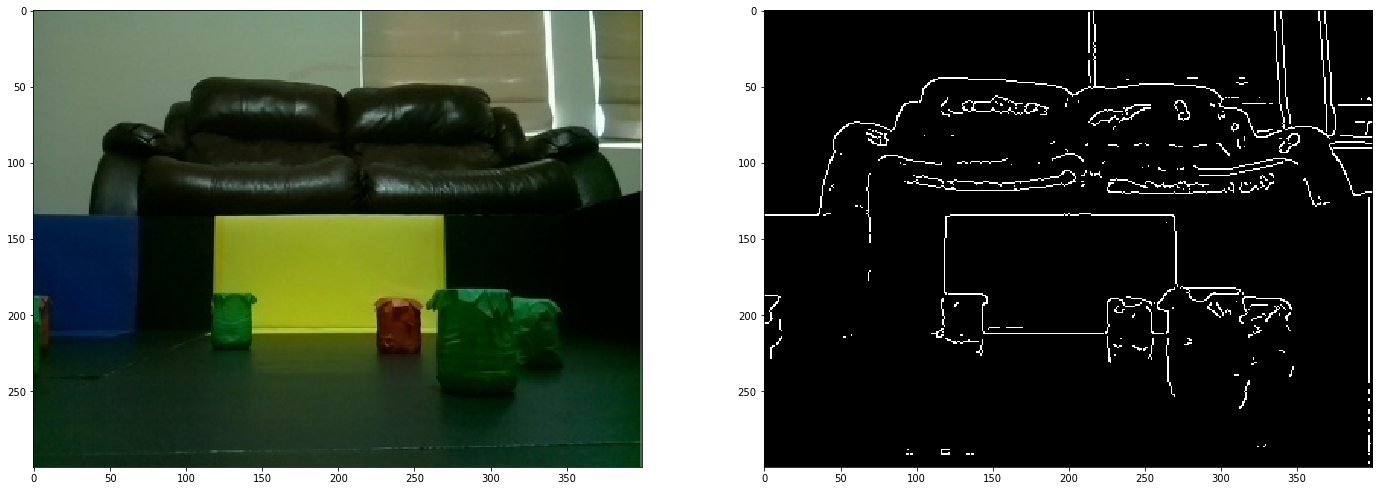

In [41]:
#try edge detector 
grayimg = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
blur = cv2.GaussianBlur(grayimg,(7,7),0)
edges = cv2.Canny(blur,40,40)
plt.subplot(121), plt.imshow(img,'gray')
plt.subplot(122), plt.imshow(edges,'gray')